# Injecting a Watermark into a Video

In [4]:
!pip3 install opencv-python

     ---------------------------------------- 38.2/38.2 MB 8.7 MB/s eta 0:00:00


### Importing Pillow for image processing and displaying/resizing a watermark

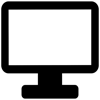

In [3]:
from PIL import Image, ImageDraw, ImageFont

watermark = Image.open('watermarksample.png')
watermark = watermark.resize((100, 100))
# display watermark 
watermark

In [7]:
import cv2
import numpy as np

def InjectWatermarkInVideo(position, video_path, watermark_path, output_path):
    watermark = cv2.imread(watermark_path, cv2.IMREAD_UNCHANGED)
    watermark = cv2.resize(watermark, (100, 100))
    watermark = cv2.cvtColor(watermark, cv2.COLOR_BGR2BGRA)
    video = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    fps = video.get(cv2.CAP_PROP_FPS)
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    while True:
        ret, frame = video.read()
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2BGRA)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGRA2RGBA)
            frame = Image.fromarray(frame)
            box = (position[0], position[1], position[0] + watermark.shape[1], position[1] + watermark.shape[0])
            frame.paste(watermark, box, mask=watermark)
            frame = np.array(frame)
            frame = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGRA)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGRA2BGR)
            video_writer.write(frame)
        else:
            break
    video.release()
    video_writer.release()
    cv2.destroyAllWindows()


InjectWatermarkInVideo((0, 0), 'video.mp4', 'watermarksample.png', 'output.mp4')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()